# Scraping `zangia.mn`
* You need to import `pandas`, `requests` and `BeautifulSoup`

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Exercise 1: Scrape `zangia.mn` page#1
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1.
  * DataFrame should include columns: `job_title`, `salary`. 
  * Remove the row if `salary` text contains `Тохиролцоно`. 
    * *Hint*: Loop over the df and use `in` and `drop` methods.
  * Take salary as 5000000 if `salary` text contains `5,000,000 -ааc дээш`
  * Import statistics library
  * Get the median salary using statistics library if there is a salary range. Example: 2,500,000-3,500,000 should be 3000000. 
    * Use string replace method to remove comma from numbers.
    * *Hint*: Use string split method to get the numbers. 
  * Make a histogram plot using the `salary`.  


In [2]:
# Your code
response = requests.get("https://www.zangia.mn/job/list/pg.1/b.4")
soup = BeautifulSoup(response.content)

In [3]:
wrapper = soup.find("div", {"class":"list"})

In [4]:
ads = wrapper.find_all("div", {"class":"ad"})

In [8]:
ads[0].b.text

'ЖАВА ПРОГРАММИСТ (Senior developer)'

In [11]:
ads[0].span.text

'3,000,000 - 4,000,000 Тохиролцоно'

In [12]:
data = []
for ad in ads:
  title = ad.b.text
  salary = ad.span.text
  data += [{"title": title, "salary":salary}]

In [21]:
df = pd.DataFrame(data)

In [22]:
import statistics
for i in range(len(df)):
  if "Тохиролцоно" in df['salary'][i]:
    df = df.drop(i)
  elif "5,000,000 -ааc дээш" in df['salary'][i]:
    df['salary'][i] = 5000000
  else:
    min_salary = int(df['salary'][i].replace(",","").split("-")[0])
    max_salary = int(df['salary'][i].replace(",","").split("-")[1])
    median_salary = statistics.median([min_salary, max_salary])
    df['salary'][i] = median_salary

<AxesSubplot:ylabel='Frequency'>

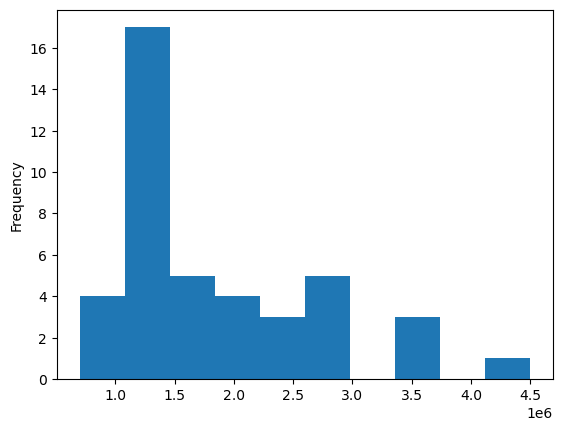

In [24]:
df['salary'].plot.hist()

### Exercise 2: Scrape `zangia.mn` Page#1 - Page#10
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1-10. *Hint* Loop over the list of pages
* Make a dataframe and make a histogram plot using `salary` column.

In [27]:
# Your code
data = []
for i in range(1, 10):
  url = f"https://www.zangia.mn/job/list/pg.{i}/b.4"
  response = requests.get(url)
  soup = BeautifulSoup(response.content)
  
  wrapper = soup.find("div", {"class":"list"})
  ads = wrapper.find_all("div", {"class":"ad"})
  
  for ad in ads:
    title = ad.b.text
    salary = ad.span.text
    data += [{"title": title, "salary":salary}]
    
df = pd.DataFrame(data)

In [28]:
df

,title,salary
0,ЖАВА ( ВЕБ ) ПРОГРАММИСТ,"1,800,000 - 2,100,000"
1,ЖАВА ПРОГРАММИСТ (Senior developer),"3,000,000 - 4,000,000 Тохиролцоно"
2,Программист( C++),"4,000,000 - 5,000,000"
3,Software Quality Assurance Engineer,"1,500,000 - 1,800,000 Тохиролцоно"
4,МЭДЭЭЛЭЛ ТЕХНОЛОГИЙН ИНЖЕНЕР,"1,200,000 - 1,500,000"
...,...,...
451,БОРЛУУЛАЛТ ҮЙЛЧИЛГЭЭНИЙ АЖИЛТАН /СЭЛЭНГЭ САЛБАР/,"600,000 - 800,000"
452,ПРОГРАМ ЗОХИОГЧ,"1,200,000 - 1,500,000"
453,Оператор,"800,000 - 1,000,000"
454,Автоматжуулалтын инженер,"2,100,000 - 2,500,000"


In [29]:
for i in range(len(df)):
  if "Тохиролцоно" in df['salary'][i]:
    df = df.drop(i)
  elif "5,000,000 -ааc дээш" in df['salary'][i]:
    df['salary'][i] = 5000000
  else:
    min_salary = int(df['salary'][i].replace(",","").split("-")[0])
    max_salary = int(df['salary'][i].replace(",","").split("-")[1])
    median_salary = statistics.median([min_salary, max_salary])
    df['salary'][i] = median_salary

<AxesSubplot:ylabel='Frequency'>

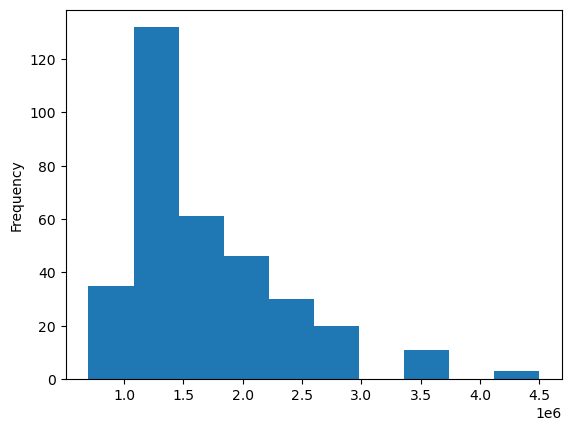

In [31]:
df['salary'].plot.hist()

### Exercise 3: Scrape `zangia.mn` Page#1 - Page#7
* Make a dataframe using `Захиргаа, Хүний нөөц` category `https://www.zangia.mn/job/list/pg.1/b.36`.
* Get job listings from page 1-7.
* Make a dataframe and make a histogram plot using `salary` column.

**WARNING** MAKE SURE YOUR LINKS ARE CORRECT!

In [35]:
# Your code
data = []
for i in range(1, 9):
  url = f"https://www.zangia.mn/job/list/pg.{i}/b.36"
  response = requests.get(url)
  soup = BeautifulSoup(response.content)
  
  wrapper = soup.find("div", {"class":"list"})
  ads = wrapper.find_all("div", {"class":"ad"})
  
  for ad in ads:
    title = ad.b.text
    salary = ad.span.text
    data += [{"title": title, "salary":salary}]
    
df = pd.DataFrame(data)

In [37]:
for i in range(len(df)):
  if "Тохиролцоно" in df['salary'][i]:
    df = df.drop(i)
  elif "5,000,000 -ааc дээш" in df['salary'][i]:
    df['salary'][i] = 5000000
  else:
    min_salary = int(df['salary'][i].replace(",","").split("-")[0])
    max_salary = int(df['salary'][i].replace(",","").split("-")[1])
    median_salary = statistics.median([min_salary, max_salary])
    df['salary'][i] = median_salary

<AxesSubplot:ylabel='Frequency'>

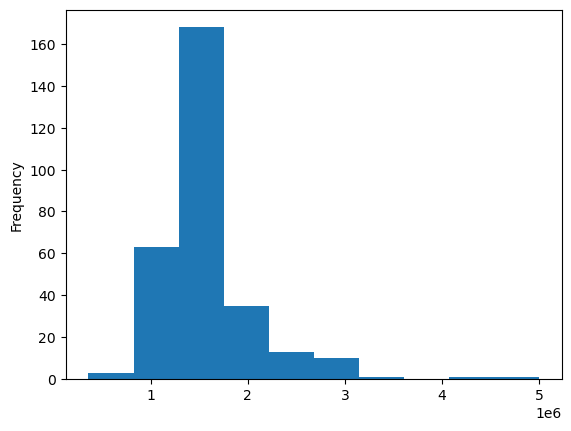

In [38]:
df['salary'].plot.hist()

In [39]:
df

,title,salary
0,"Үр дүн, бүтээмжийг эрхэмлэдэгХҮНИЙ НӨӨЦИЙН МЕН...",1650000.0
1,ЗАХИРЛЫН ЖОЛООЧ,1350000.0
2,"Хүний нөөц, оффис мэргэжилтэн (Ресепшн)",1100000.0
4,Захиргааны ажилтан,1350000.0
5,Хүний нөөцийн менежер,1950000.0
...,...,...
348,Үл хөдлөх хөрөнгийн зууч /REAL ESTATE AGENT/,2750000.0
349,Үл хөдлөх хөрөнгийн зууч /REAL ESTATE AGENT/,2750000.0
351,ХҮНИЙ НӨӨЦИЙН МЭРГЭЖИЛТЭН,1350000.0
352,Аж ахуйн менежер ажилд авна.,1950000.0
